# Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

## Attaching Resources

### Importing Necessary Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [20]:
em = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_11_Text%20Mining/Dataset/Elon_musk.csv',encoding='Latin-1')
em.drop(columns = 'Unnamed: 0', inplace = True)

em

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Performing EDA In Dataset

### Applying Lemmatization And Removing Stopword

In [21]:
lemma = WordNetLemmatizer()

corpus = []

for i in range(len(em)):
    msg = re.sub('[^a-zA-Z]',' ',em['Text'][i])
    msg = msg.lower()
    msg = msg.split()
    
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')]
    msg = ' '.join(msg)
    corpus.append(msg)

In [22]:
corpus

['kunalb alien',
 'id aa carmack ray tracing cyberpunk hdr next level tried',
 'joerogan spotify great interview',
 'gtera doge underestimated',
 'teslacn congratulation tesla china amazing execution last year next even',
 'happy new year ox http co wfkmyu oj',
 'frodo underdoge thought would fail http co zgxjfdzzrm',
 'owensparks flcnhvy anonyx haha thanks',
 'flcnhvy anonyx indeed tweet definitely represent real world time allocation',
 'entertaining outcome likely',
 'givedirectly sent',
 'agree clubhouse kanyewest',
 'http co rwe uhsts',
 'geoffkeighley unrealengine getting real',
 'bought dogecoin lil x toddler hodler',
 'joshmanmode definitely issue sentencing seems bit high',
 'freewalletorg thanks fixing',
 'freewalletorg please unlock account',
 'astrojordy u f u f',
 'true power haha http co fc uhqsd',
 'freewalletorg crypto wallet give private key avoided cost',
 'freewalletorg app suck',
 'rt spacex nasa selected falcon heavy launch first two element lunar gateway together 

### Performing Word Tokenize

In [23]:
word = []

for i in corpus:
    words = word_tokenize(i)
    word.append(words)

In [24]:
word

[['kunalb', 'alien'],
 ['id',
  'aa',
  'carmack',
  'ray',
  'tracing',
  'cyberpunk',
  'hdr',
  'next',
  'level',
  'tried'],
 ['joerogan', 'spotify', 'great', 'interview'],
 ['gtera', 'doge', 'underestimated'],
 ['teslacn',
  'congratulation',
  'tesla',
  'china',
  'amazing',
  'execution',
  'last',
  'year',
  'next',
  'even'],
 ['happy', 'new', 'year', 'ox', 'http', 'co', 'wfkmyu', 'oj'],
 ['frodo',
  'underdoge',
  'thought',
  'would',
  'fail',
  'http',
  'co',
  'zgxjfdzzrm'],
 ['owensparks', 'flcnhvy', 'anonyx', 'haha', 'thanks'],
 ['flcnhvy',
  'anonyx',
  'indeed',
  'tweet',
  'definitely',
  'represent',
  'real',
  'world',
  'time',
  'allocation'],
 ['entertaining', 'outcome', 'likely'],
 ['givedirectly', 'sent'],
 ['agree', 'clubhouse', 'kanyewest'],
 ['http', 'co', 'rwe', 'uhsts'],
 ['geoffkeighley', 'unrealengine', 'getting', 'real'],
 ['bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler'],
 ['joshmanmode', 'definitely', 'issue', 'sentencing', 'seems', 'bit'

## Creating Word Cloud

In [25]:
def worldcloud(data):
    txt = ' '.join(data)
    stop = STOPWORDS
    
    wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title('worldcloud',size = 50)

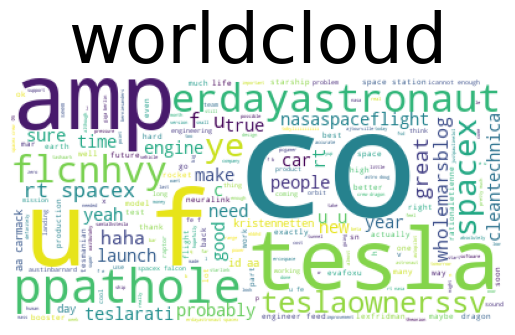

In [26]:
worldcloud(corpus)

## Performing Data Preprocesing

### Creating Bag Of Word's

In [27]:
cv = CountVectorizer()

x = cv.fit_transform(corpus)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
cv.get_feature_names_out()

array(['aa', 'aayypcpp', 'ab', ..., 'zynsxisp', 'zz', 'zzcool'],
      dtype=object)

In [29]:
bow = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

bow

,aa,aayypcpp,ab,aber,able,abo,aboard,abort,absence,absolute,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating Tf-Idf

In [30]:
tf = TfidfVectorizer()

x_tf = tf.fit_transform(corpus)

x_tf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25287088, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [31]:
tf.get_feature_names_out()

array(['aa', 'aayypcpp', 'ab', ..., 'zynsxisp', 'zz', 'zzcool'],
      dtype=object)

In [32]:
tf_idf = pd.DataFrame(x_tf.toarray(), columns=tf.get_feature_names_out())

tf_idf

,aa,aayypcpp,ab,aber,able,abo,aboard,abort,absence,absolute,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.252871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Perform Sentimental Analysis

In [42]:
df_corpus = pd.DataFrame(corpus, columns= ['txt'])

df_corpus

,txt
0,kunalb alien
1,id aa carmack ray tracing cyberpunk hdr next l...
2,joerogan spotify great interview
3,gtera doge underestimated
4,teslacn congratulation tesla china amazing exe...
...,...
1994,flcnhvy true sound surreal negative propaganda...
1995,ppathole make sure read ur term amp condition ...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb dumber u f u f


In [43]:
df_corpus['sentiment']=df_corpus['txt'].apply(lambda x : TextBlob(x).sentiment.polarity)

df_corpus

,txt,sentiment
0,kunalb alien,-0.250000
1,id aa carmack ray tracing cyberpunk hdr next l...,0.000000
2,joerogan spotify great interview,0.800000
3,gtera doge underestimated,0.000000
4,teslacn congratulation tesla china amazing exe...,0.200000
...,...,...
1994,flcnhvy true sound surreal negative propaganda...,0.152381
1995,ppathole make sure read ur term amp condition ...,0.500000
1996,teslagong ppathole samwise gamgee,0.000000
1997,ppathole altho dumb dumber u f u f,-0.375000


### Sorting Review Into Negtive Or Positive

In [44]:
def assign_Result(ratings):
    if ratings < 0:
        result = 'negative'
    elif ratings >= 0:
        result = 'positive'

    return result

In [45]:
df_corpus['review_segment']=df_corpus['sentiment'].apply(assign_Result)

df_corpus

,txt,sentiment,review_segment
0,kunalb alien,-0.250000,negative
1,id aa carmack ray tracing cyberpunk hdr next l...,0.000000,positive
2,joerogan spotify great interview,0.800000,positive
3,gtera doge underestimated,0.000000,positive
4,teslacn congratulation tesla china amazing exe...,0.200000,positive
...,...,...,...
1994,flcnhvy true sound surreal negative propaganda...,0.152381,positive
1995,ppathole make sure read ur term amp condition ...,0.500000,positive
1996,teslagong ppathole samwise gamgee,0.000000,positive
1997,ppathole altho dumb dumber u f u f,-0.375000,negative


### visualizing The Results

<AxesSubplot:>

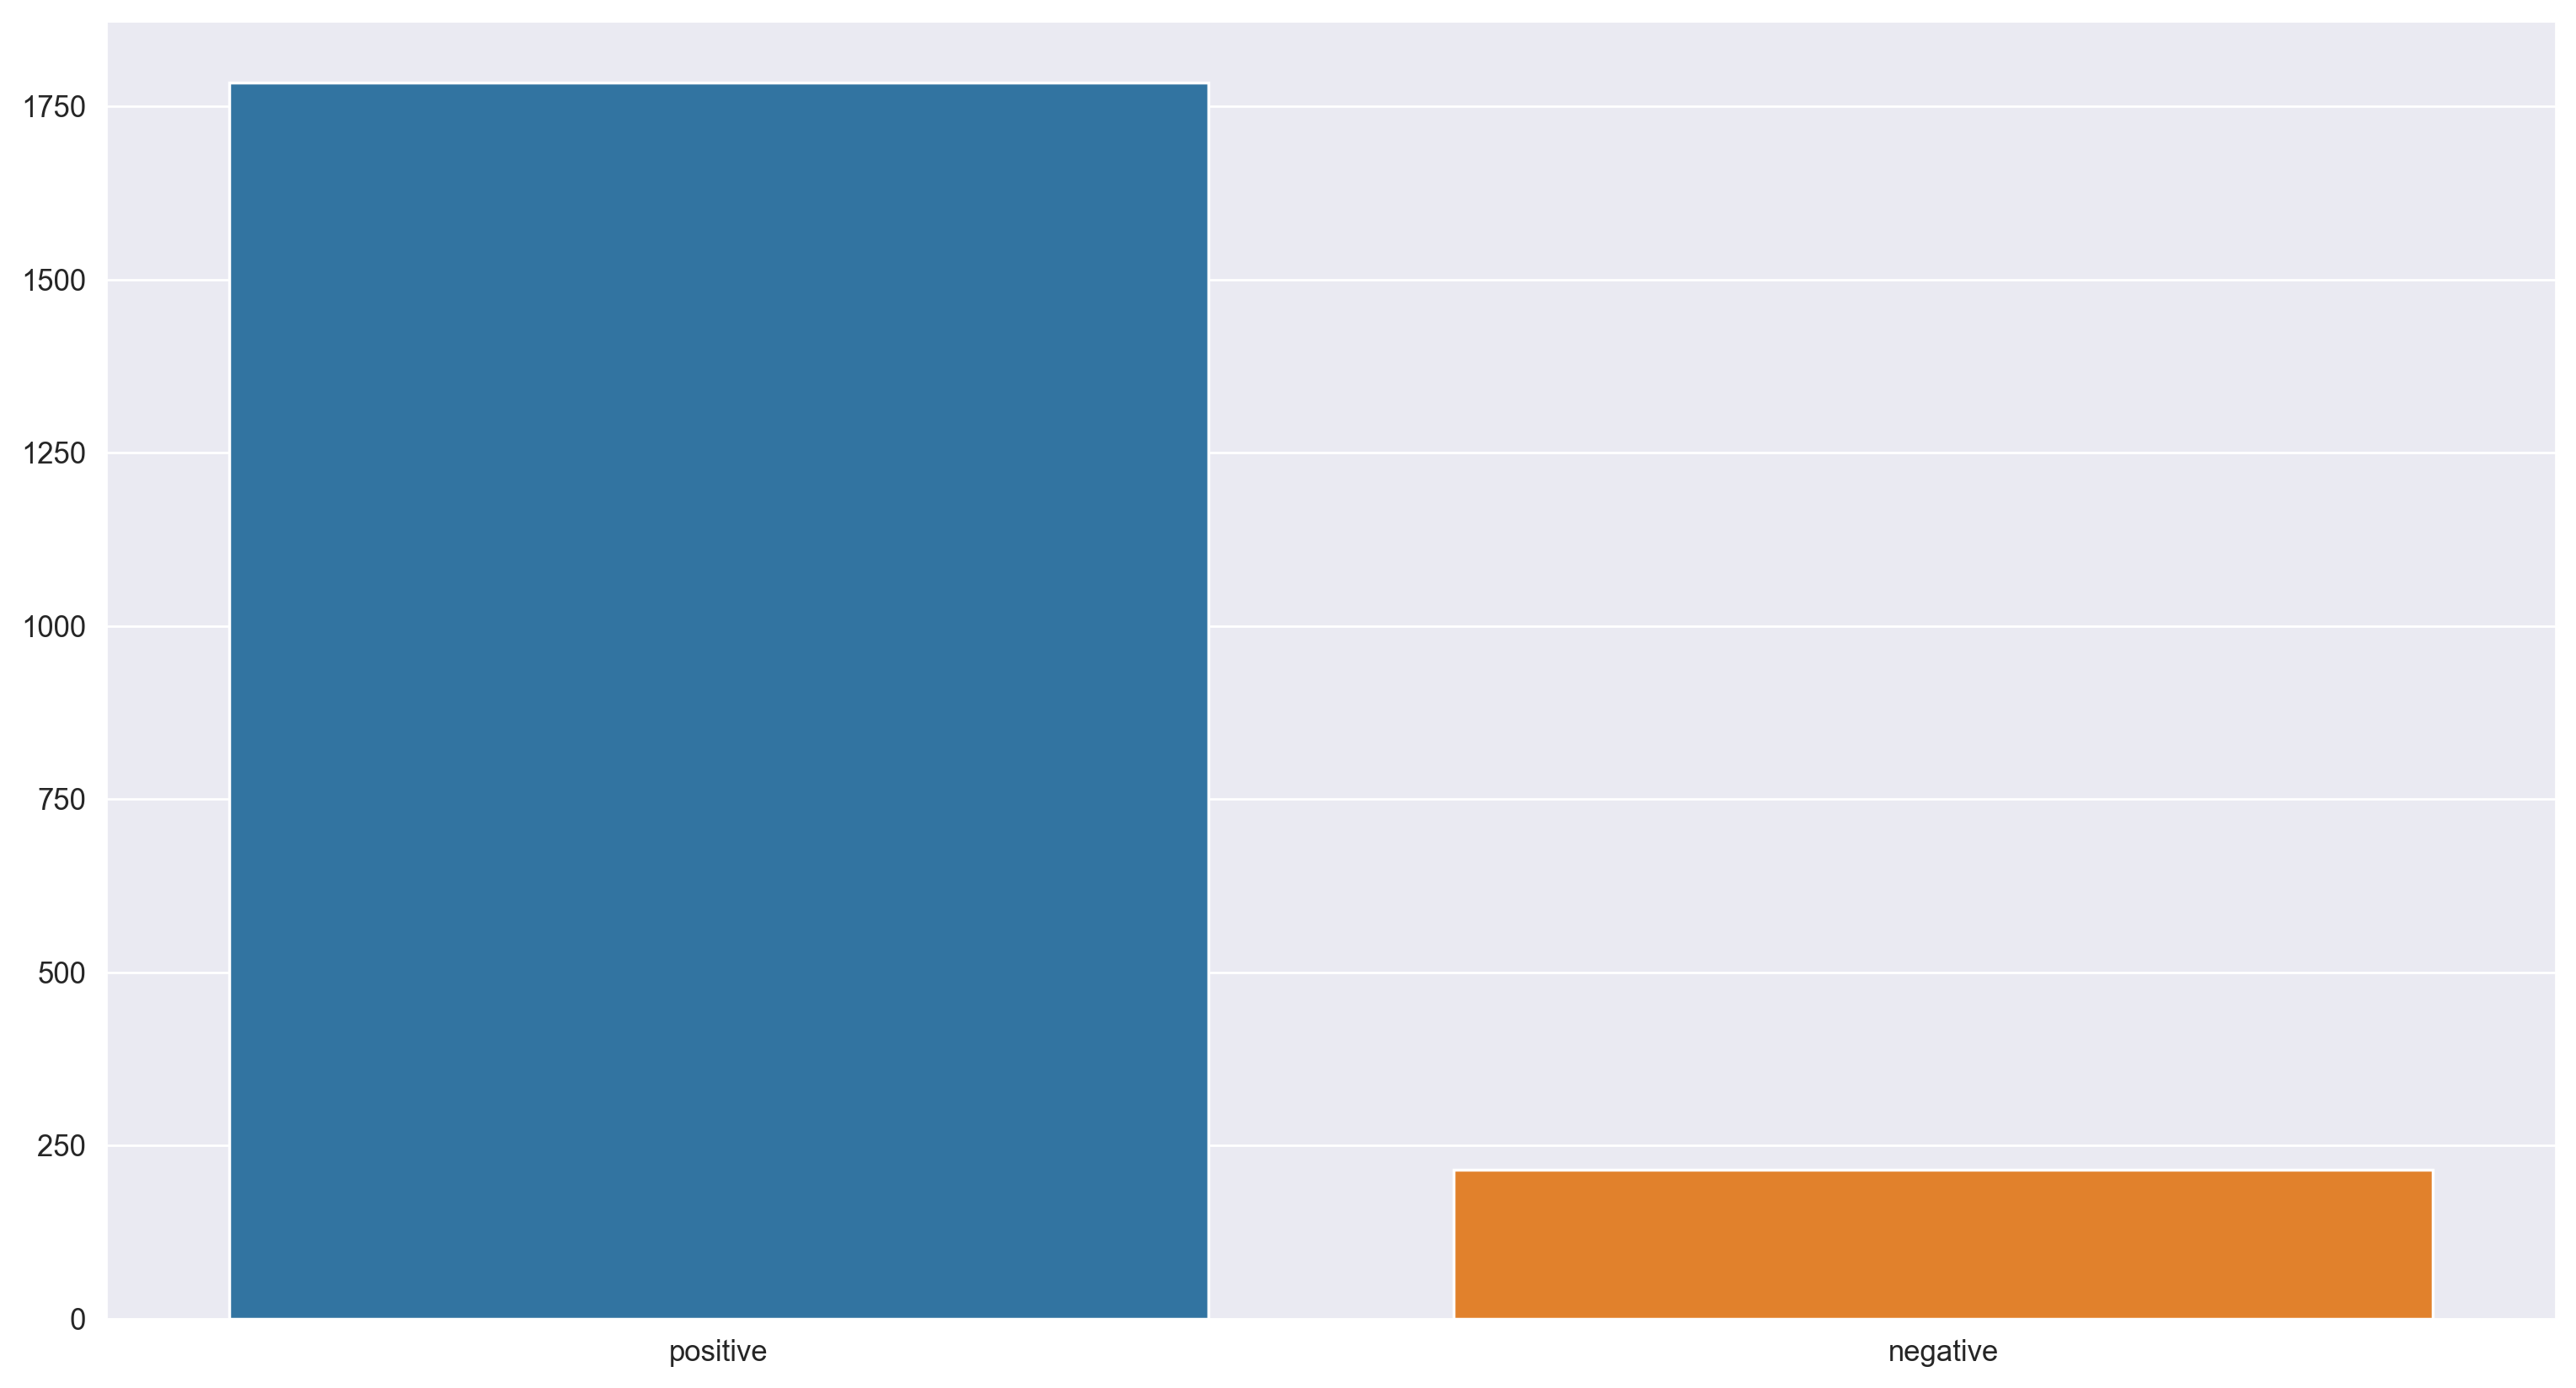

In [60]:
sns.barplot(df_corpus['review_segment'].value_counts().index, df_corpus['review_segment'].value_counts().values)

<AxesSubplot:ylabel='review_segment'>

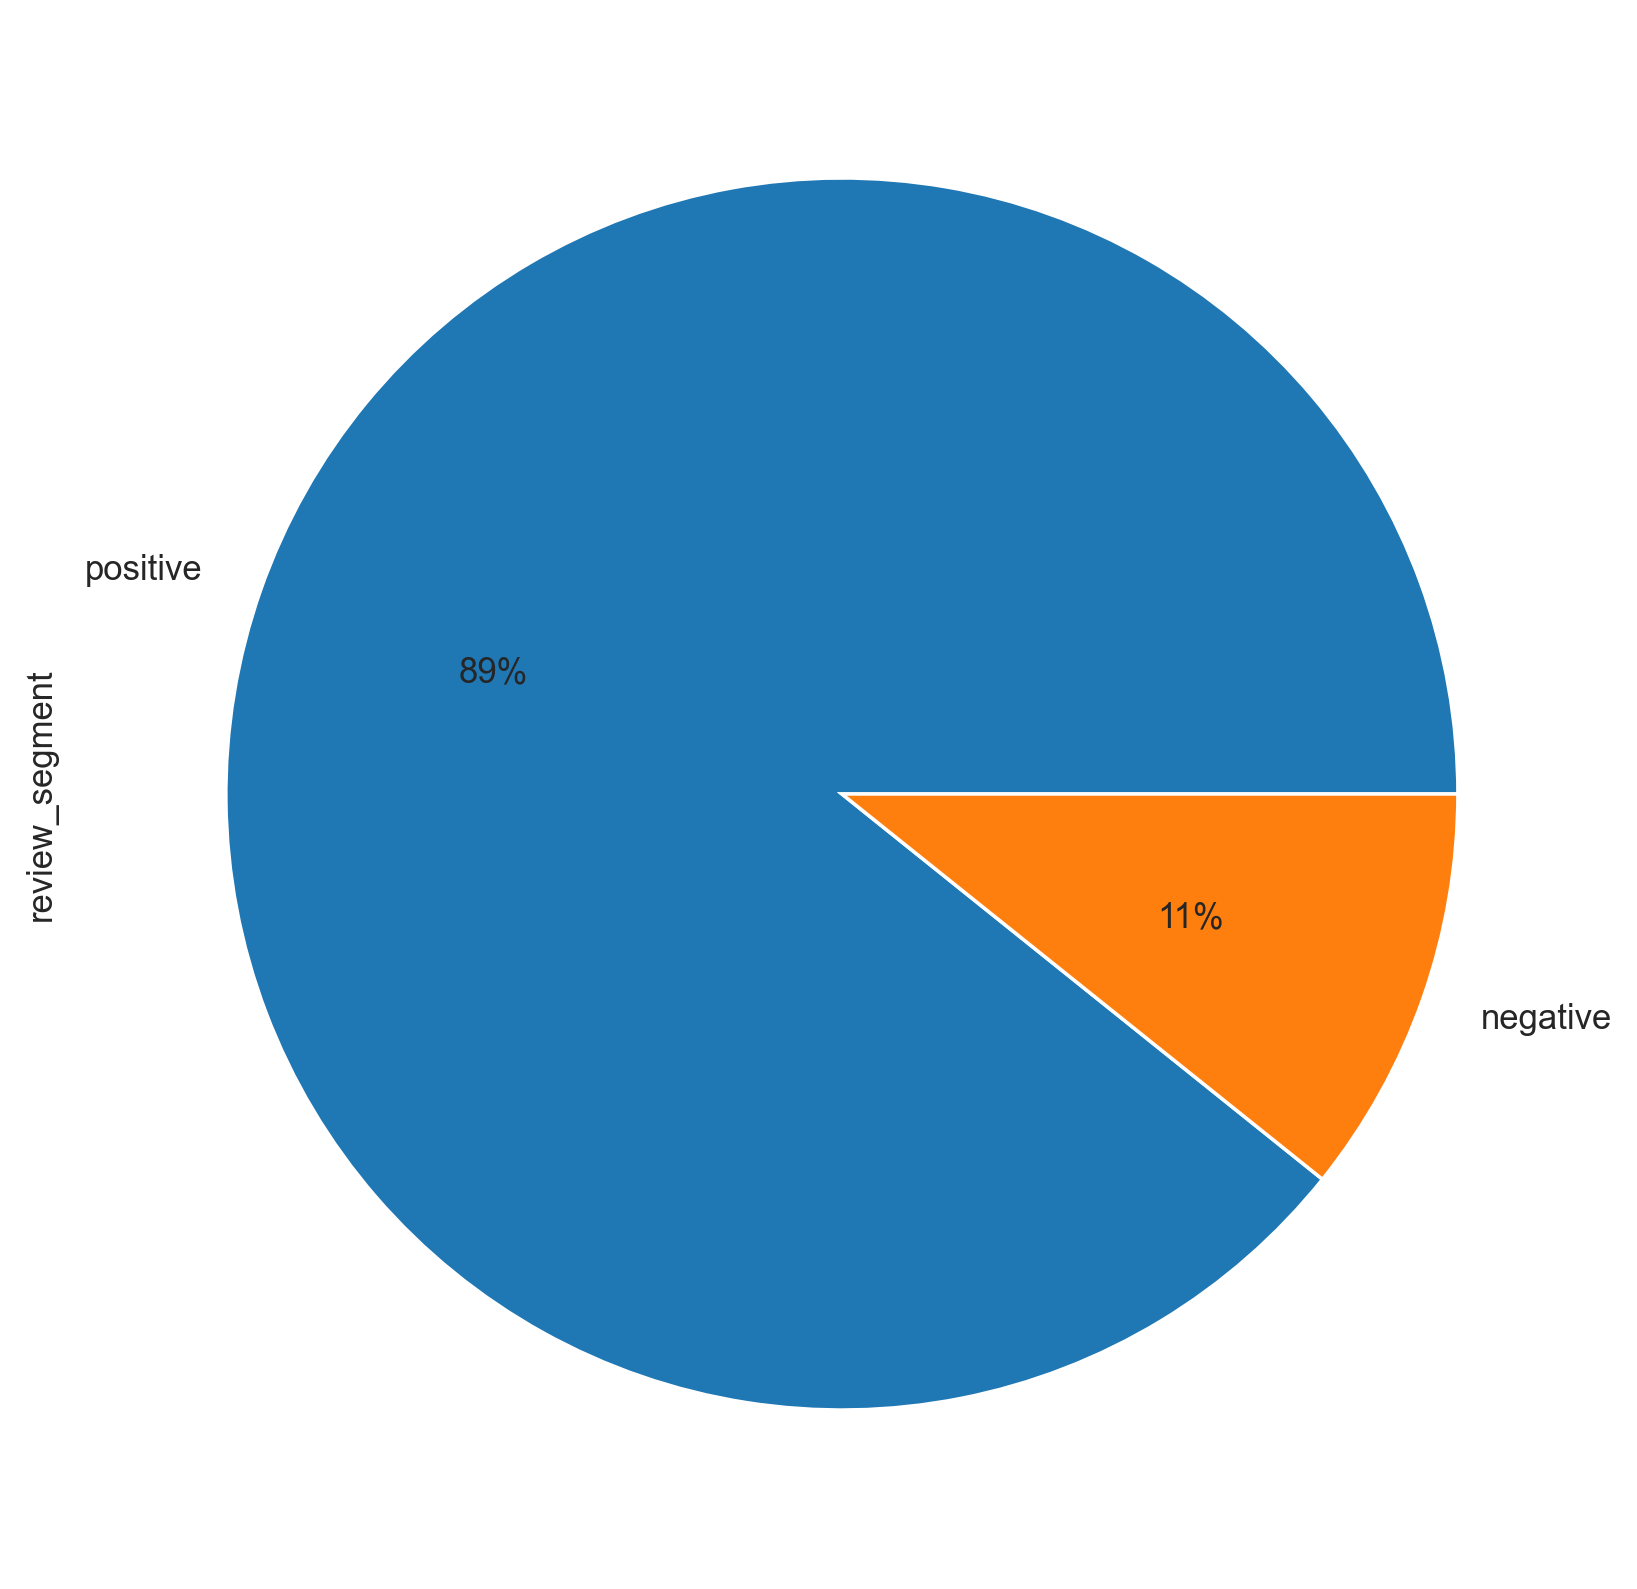

In [63]:
df_corpus['review_segment'].value_counts().plot(kind='pie',autopct='%1.00f%%')